In [228]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

In [229]:

data = pd.read_csv("in.csv")
     

In [231]:
size = int(len(data) * 0.66)
train, test = data[0:size], data[size:len(data)]

In [232]:
from statsmodels.tsa.arima.model import ARIMA

In [233]:
print(train.head(10))

     Month  Sales(USD)
0  2021-01       266.0
1  2021-02       145.9
2  2021-03       183.1
3  2021-04       119.3
4  2021-05       180.3
5  2021-06       168.5
6  2021-07       231.8
7  2021-08       224.5
8  2021-09       192.8
9  2021-10       122.9


In [234]:
import statsmodels.api as sm

In [235]:
df=data

In [236]:
df.head(10)

,Month,Sales(USD)
0,2021-01,266.0
1,2021-02,145.9
2,2021-03,183.1
3,2021-04,119.3
4,2021-05,180.3
5,2021-06,168.5
6,2021-07,231.8
7,2021-08,224.5
8,2021-09,192.8
9,2021-10,122.9


In [237]:
df=df.set_index('Month')

<Axes: xlabel='Month'>

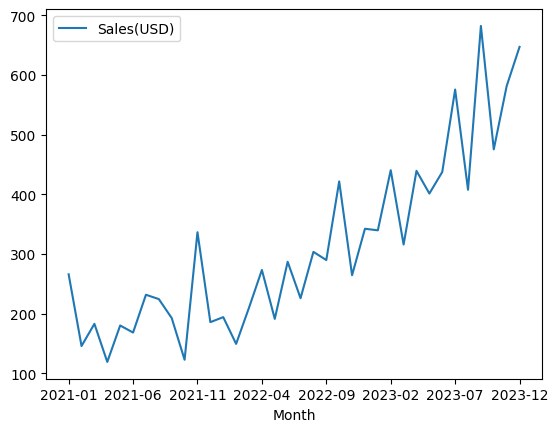

In [238]:
df.plot()

In [239]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [240]:
df['first_diff']=df-df.shift(1)

In [241]:
size=int(len(df)*0.66)
train=df[:size]
test=df[size:]

In [242]:
auto_arima(df['first_diff'].dropna(),  trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=430.873, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=406.022, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=409.013, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=429.229, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=403.628, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=404.692, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=404.286, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=402.467, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=401.530, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec

Best 

ARIMA(order=(1, 0, 2), scoring_args={}, suppress_warnings=True)

In [243]:
model=ARIMA(train['first_diff'],order=(1, 0, 2))
result=model.fit()
result.summary()

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             first_diff   No. Observations:                   23
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -121.724
Date:                Thu, 25 Jan 2024   AIC                            253.447
Time:                        01:38:32   BIC                            259.125
Sample:                    01-01-2021   HQIC                           254.875
                         - 11-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4461      3.020      2.134      0.033       0.527      12.366
ar.L1         -0.8589      0.348     -2.471      0.013      -1.540      -0.178
ma.L1         -0.3402    149.863     -0.002      0.998    -294.067     293.386
ma.L2         -0.6594     98.713     -0.007      0.995    -194.134     192.815
sigma2      3180.3813   4.75e+05      0.007      0.995   -9.28e+05    9.35e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 1.97
Prob(Q):                              0.63   Prob(JB):                         0.37
Heteroskedasticity (H):               1.67   Skew:                             0.71
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [244]:
df['pred']=result.predict(start=len(train),end=len(df)-1)

In [245]:
df.tail(15)

,Sales(USD),first_diff,pred
Month,,,
2022-10,421.6,131.7,NaN
2022-11,264.5,-157.1,NaN
2022-12,342.3,77.8,65.254072
2023-01,339.7,-2.6,-45.113207
2023-02,440.4,100.7,50.731289
2023-03,315.9,-124.5,-31.591373
2023-04,439.3,123.4,39.117129
2023-05,401.3,-38.0,-21.615750
2023-06,437.4,36.1,30.548876


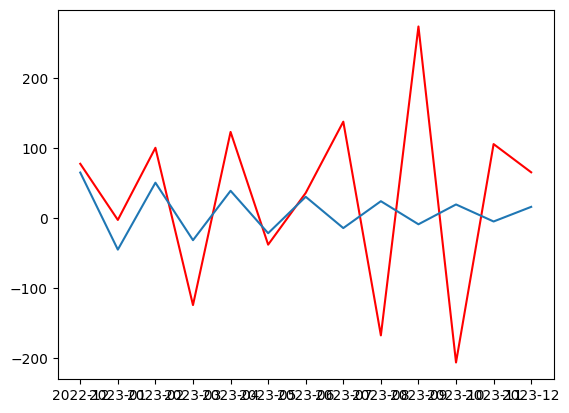

In [246]:
plt.plot(test['first_diff'],color='red')
plt.plot(df['pred'])

In [247]:
import numpy as np

In [248]:
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(test['first_diff'], df['pred'].dropna()))
rms

132.0735103538804

In [249]:
print(df.index)

Index(['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
       '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12'],
      dtype='object', name='Month')


In [250]:
import pandas as pd

In [252]:
df.tail(14)

,Sales(USD),first_diff,pred
Month,,,
2022-11,264.5,-157.1,NaN
2022-12,342.3,77.8,65.254072
2023-01,339.7,-2.6,-45.113207
2023-02,440.4,100.7,50.731289
2023-03,315.9,-124.5,-31.591373
2023-04,439.3,123.4,39.117129
2023-05,401.3,-38.0,-21.615750
2023-06,437.4,36.1,30.548876
2023-07,575.5,138.1,-14.256314


In [253]:
import matplotlib.pyplot as plt

In [254]:
df = df.dropna()
df.head()

,Sales(USD),first_diff,pred
Month,,,
2022-12,342.3,77.8,65.254072
2023-01,339.7,-2.6,-45.113207
2023-02,440.4,100.7,50.731289
2023-03,315.9,-124.5,-31.591373
2023-04,439.3,123.4,39.117129


In [256]:
df['predict']=df['Sales(USD)']+df['pred']


C:\Users\User\AppData\Local\Temp\ipykernel_8480\4230191934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predict']=df['Sales(USD)']+df['pred']


In [257]:
df.tail(14)

,Sales(USD),first_diff,pred,predict
Month,,,,
2022-12,342.3,77.8,65.254072,407.554072
2023-01,339.7,-2.6,-45.113207,294.586793
2023-02,440.4,100.7,50.731289,491.131289
2023-03,315.9,-124.5,-31.591373,284.308627
2023-04,439.3,123.4,39.117129,478.417129
2023-05,401.3,-38.0,-21.615750,379.684250
2023-06,437.4,36.1,30.548876,467.948876
2023-07,575.5,138.1,-14.256314,561.243686
2023-08,407.6,-167.9,24.227717,431.827717


In [263]:
rms = np.sqrt(mean_squared_error(df['predict'].dropna(), test['Sales(USD)']))
rms

33.20070631858316

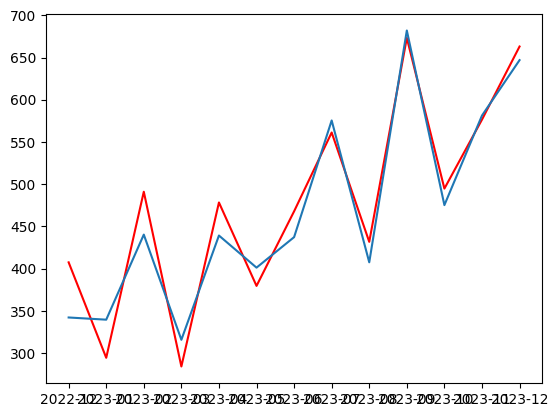

In [264]:
plt.plot(df['predict'], color='red')
plt.plot(test['Sales(USD)'])

<Axes: xlabel='Month'>

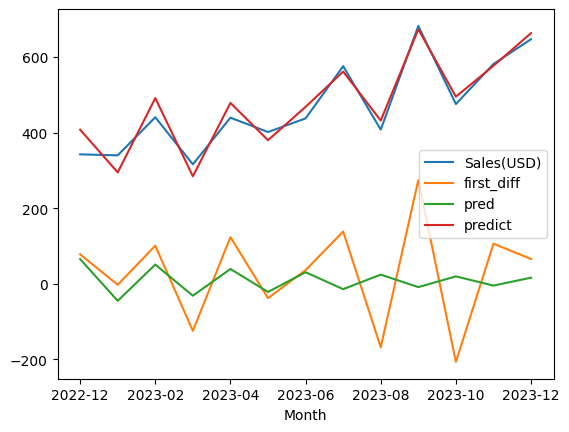

In [265]:
df.plot()